# P2 Project: Titanic

## 1.Background and problem definition


### Background Information 背景信息
The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.
https://www.kaggle.com/c/titanic

### Problem solving in this project 问题描述

Which features(ex:economic,demographic...) have strong relations with the possibility of survive? How? Why?

哪一些特征（人口的，经济的...）与生存率有显著关系？如何相关？可能的解释有？

## 2.Acquire, wrangle and cleanse data 数据获取，清理及初步处理|

### Data Dictionary 数据描述

Variable	Definition	        Key
survival	Survival	        0 = No, 1 = Yes
pclass	   Ticket class	       1 = 1st, 2 = 2nd, 3 = 3rd
sex	      Sex	
Age	      Age in years	
sibsp	   # of siblings / spouses aboard the Titanic	
parch	   # of parents / children aboard the Titanic	
ticket	   Ticket number	
fare	   Passenger fare	
cabin	   Cabin number	
embarked	Port of Embarkation	   C = Cherbourg, Q = Queenstown, S = Southampton

notes:
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

https://www.kaggle.com/c/titanic/data

In [1]:
#Introduce labs导入库
import pandas as pd
import numpy as np
import random as rnd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Acquire Data from csv files读取文件
tdata = pd.read_csv('titanic_data.csv')
tdata.head() # Preview

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data type analysis 数据类型分析

In [3]:
# Data type descirption
tdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


总共有12个变量，从data dictionary可以看出，Survived,Sex,Embarke,Pclass是分类数据catagorical data，其中Pclass是有序数据(1st>2nd>3rd)。

尽管有7个变量是数值类型float/int，但在之后处理中用到的数值变量只有四个：Age,Fare,SibSp,Parch。

Ticket和Cabin变量混合了数值与字母，需要进一步的处理。

Name变量非常复杂（名字缩写，性别，称号等等...）而且很可能是没用的（个人偏见），除了某些royal/noble name可能和其他变量相关，但我缺少姓名相关的知识背景无法进行判断，可能会排除这类数据。

Cabin,Age,Embarked三个变量存在空白或者null字段，需要进一步处理。

### Simple observation of data 数据简单描述

In [4]:
#numerical data decription
tdata.describe(percentiles=[.25,.30,.50,.75,.90]) #使用 percentiles=[.20, .90]等数值改变区间看比例

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
30%,268.000000,0.000000,2.000000,22.000000,0.000000,0.000000,8.050000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
90%,802.000000,1.000000,3.000000,50.000000,1.000000,2.000000,77.958300
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


在这个891人的样本中，平均存活率为38.4%。
乘坐头等舱的乘客数量少于25%。
大约90%的乘客年龄小于50岁，大约57%的乘客年龄小于30岁。

大约30%的乘客是与兄弟姐妹或者夫妻(SibSp)一起登船。
超过75%的乘客没有与父母或子女一起登船。

In [5]:
tdata.describe(include=['O']) #string data description

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


没有重名乘客。
男性在乘客中占了65%。绝大部分乘客从S(Southampton)处登船。

票号有大量重复，需要进一步处理。
Cabin数据有大量重复以及缺失，需要进一步处理。

### Cleanse of data 数据清理

根据以上分析，可能需要进一步进行处理的数据有Age,Name, PassengerId, Ticket，Cabin，Embarked五项。

数值类数据Age有部分缺失，但样本数量足够，不会对统计结果有太大影响。本项目中会用基于正态分布的随机数对Null项目进行填充。（当然也可以利用姓名中的Mrs,Miss等进行补全，本项目没有进行这一步）。另外在后续处理中需要将float转为int。

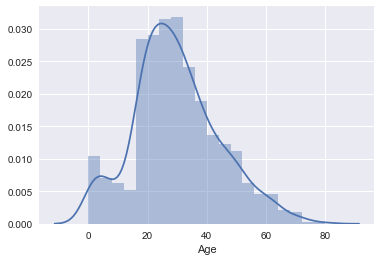

In [6]:
# 计算均值标准差和需要填充的数量，为了之后的随机数生成做准备
avage = tdata["Age"].mean()
stdage = tdata["Age"].std()
countmissingage = tdata["Age"].isnull().sum()

# 生成基于正态分布的随机数
randage = np.random.randint(avage - stdage, avage + stdage, size = countmissingage)

# float转化为int，并且生成原数据柱状图
sns.distplot(tdata['Age'].dropna().astype(int))

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


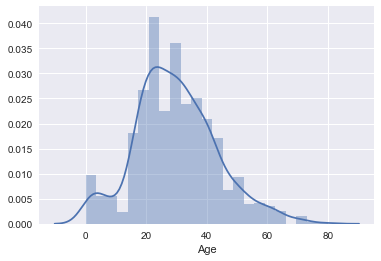

In [7]:
# 填充缺失值
tdata["Age"][np.isnan(tdata["Age"])] = randage                           
# float转换为int
tdata['Age'] = tdata['Age'].astype(int)
# 新柱状图
sns.distplot(tdata['Age'])

由两个柱状图对比可以认为Age的Null填充是符合实际情况的。

PassengerID显然与结论无关可以清除。
Name由于过分复杂超过我目前能力范围，决定清除。
Ticket存在大量重复，Cabin有大量缺失数据以及重复。本次项目暂时清除。以后可进行进一步处理。（根据常识判断，Ticket与Cabin，fare，Pclass可能是相关的。）

In [8]:
tdata = tdata.drop(['PassengerId','Name','Ticket','Cabin'], axis = 1)

Embarked数据只缺失了两个数据，保留。

In [9]:
tdata["Embarked"] = tdata["Embarked"].fillna("S") 
# S登船的出现比率最高，因此把2个空白项填充为S，可以基本不影响后续的分析

In [10]:
print tdata.head() #preview again检查一下清理后的数据
print tdata.describe()
print tdata.describe(include=['O'])

   Survived  Pclass     Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    male   22      1      0   7.2500        S
1         1       1  female   38      1      0  71.2833        C
2         1       3  female   26      0      0   7.9250        S
3         1       1  female   35      1      0  53.1000        S
4         0       3    male   35      0      0   8.0500        S
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.745230    0.523008    0.381594   32.204208
std      0.486592    0.836071   13.544897    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.000000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   21.000000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   29.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.00000

## 3.Analyze, identify patterns, and explore the data

### Pclass

In [11]:
#Pclass
PclassS = tdata[['Survived','Pclass']].groupby(['Pclass'],as_index = False).mean()
PclassS

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


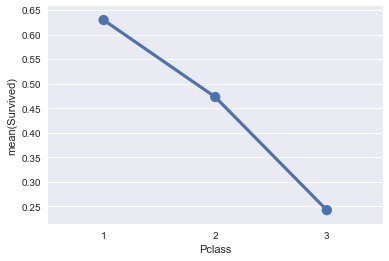

In [12]:
# http://seaborn.pydata.org/tutorial/categorical.html
sns.pointplot(x = 'Pclass' , y = 'Survived', data = PclassS)

舱位与生存率正相关。这与实际观察相符，因为头等舱通常在上层，靠近甲板，逃生方便。

### Sex

In [13]:
SexS = tdata[['Survived','Sex']].groupby(['Sex'],as_index = False).mean()
SexS

,Sex,Survived
0,female,0.742038
1,male,0.188908


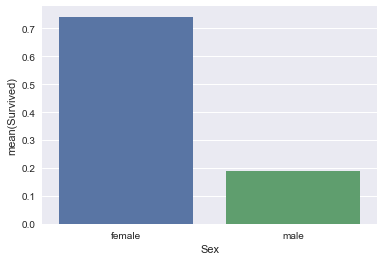

In [14]:
sns.barplot(x = 'Sex' , y = 'Survived', data = SexS)

In [15]:
tdataSexPclass = tdata[['Survived','Sex', 'Pclass']].groupby(['Sex','Pclass'],as_index = False).mean()

In [16]:
tdataSexPclass

,Sex,Pclass,Survived
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


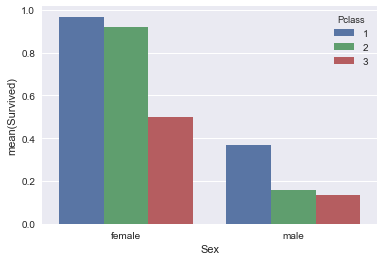

In [17]:
sns.barplot(x = 'Sex' , y = 'Survived', hue = 'Pclass', data = tdataSexPclass)

无论在何种舱位，女性的生存率都远高于男性，这也符合历史真实情况。

### Age

In [18]:
AgeS = tdata[['Age','Survived']].groupby(['Age'],as_index = False).mean()

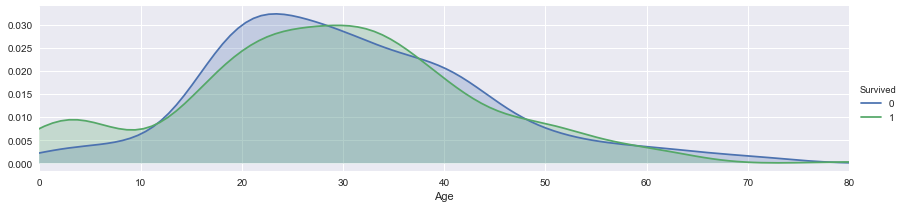

In [19]:
# http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid
facet = sns.FacetGrid(tdata, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True).add_legend() #各年龄基于生存与否的密度函数
facet.set(xlim=(0, 80)) 

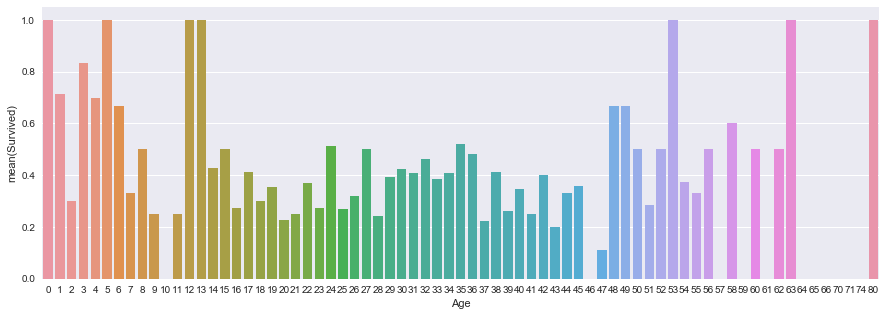

In [20]:
fig = plt.subplots(1,1,figsize=(15,5))
sns.barplot(x = 'Age', y = 'Survived', data = AgeS) #各年龄生存率的柱状图

In [21]:
tdata[['Survived','Age']].loc[tdata["Age"] < 14].count()# 检查样本量

Survived    71
Age         71
dtype: int64

In [22]:
tdata[['Survived','Age']].loc[tdata["Age"] > 52].count()# 检查样本量

Survived    51
Age         51
dtype: int64

由两张图可以发现，小于14岁的儿童以及大于52岁的老人生存率显著较高。检查了两组人的样本数量，保证了这不是小概率事件，结论正确。

### SibSp & Parch - Family

SibSp和Parch都是有关家庭成员数量的变量，虽然两者有所区别，但区别可能不明显，因此创建两个新变量来研究这种关系。Alone（True,False）表示是否一个人登船，Family表示一同登船的家庭成员总数量。

In [23]:
tdata['Family'] =  tdata["Parch"] + tdata["SibSp"]  #Family表示一同登船的家庭成员总数量。

In [24]:
tdata['Alone'] = tdata['Family'] == 0 #Alone（True,False）表示是否一个人登船

In [25]:
SibspS = tdata[['SibSp','Survived']].groupby(['SibSp'],as_index = False).mean()
ParchS = tdata[['Parch','Survived']].groupby(['Parch'],as_index = False).mean()

In [26]:
AloneS = tdata[['Alone','Survived']].groupby(['Alone'],as_index = False).mean()
FamilyS = tdata[['Family','Survived']].groupby(['Family'],as_index = False).mean()

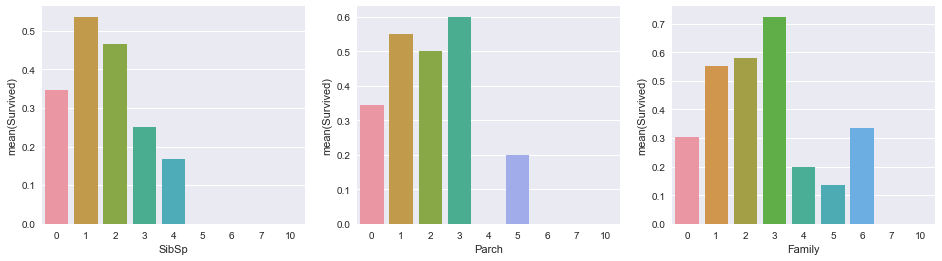

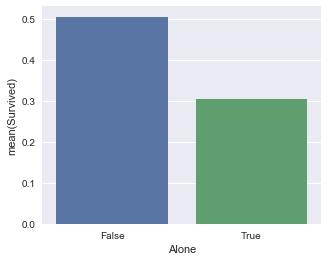

In [27]:
#plots
fig,(axis1,axis2, axis3) = plt.subplots(1,3,sharex = True, figsize = (16,4))
sns.barplot(x = 'SibSp', y = 'Survived', data = SibspS, ax = axis1)
sns.barplot(x = 'Parch', y = 'Survived', data = ParchS, ax = axis2)
sns.barplot(x = 'Family', y = 'Survived', data = FamilyS, ax = axis3)
fig,(axis1) = plt.subplots(1,1,sharex = True, figsize = (5,4))
sns.barplot(x = 'Alone', y = 'Survived',data = AloneS)

In [28]:
print (tdata["SibSp"] == 3).sum() # 检查SibSp = 3的样本数量
print (tdata['Parch'] == 3).sum() # 检查Parch = 3的样本数量

16
5


由以上barplots可以发现：
1.有家庭成员一同登船的乘客最终生存率要高出独自旅行的乘客近65%。
2.在与家庭成员一同登船的乘客中，家庭成员数量为1-3个的生存率较高，当超过4个时，生存率变得很低，甚至低于平均的生存率。
3.SibSp与Parch对于是否生存的影响类似，只在SibSp/Parch = 3时有显著差异,但这很可能是由于样本数量小导致的。

### Fare

In [29]:
# 建立一个生存与死亡乘客的票价对比dataframe
fareS = pd.DataFrame()
fareS["Fare_all"] = tdata['Fare'] #保证新dataframe有891行，有别的方法吗？
fareS['Nonsurvived'] = 0 + tdata[['Fare']].loc[tdata['Survived'] == 0]
fareS['Survived'] = 0 + tdata[['Fare']].loc[tdata['Survived'] == 1]
del fareS['Fare_all']

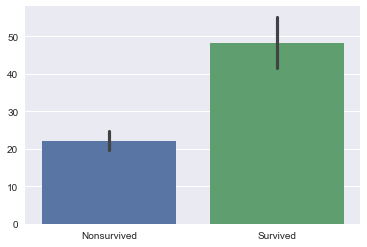

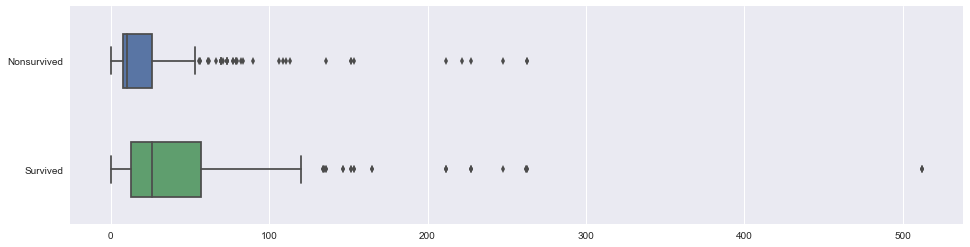

In [30]:
#plots
sns.barplot(data = fareS)
fig,(axis1) = plt.subplots(1,1,sharex = True, figsize = (16,4))
sns.boxplot(data = fareS, orient = 'h',width = 0.5, ax = axis1) 

从票价来看，存活下来的乘客所付的票价比死亡乘客所付票价要高，原因可能是高票价与舱位正相关（如下图）。

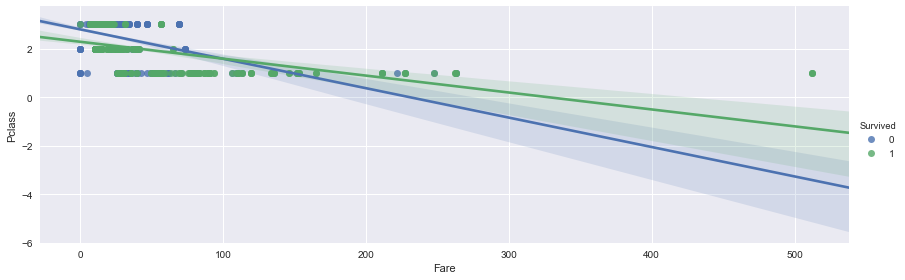

In [31]:
sns.lmplot(x="Fare", y="Pclass", hue = 'Survived',scatter = True, fit_reg = True, \
           data = tdata, size = 4, aspect = 3) 
# http://seaborn.pydata.org/generated/seaborn.lmplot.html#seaborn.lmplot有更好的可视化方式吗？

### Embarked

In [32]:
# 检查各港口登船人群的生存率
embarkS = tdata[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean()
embarkS

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


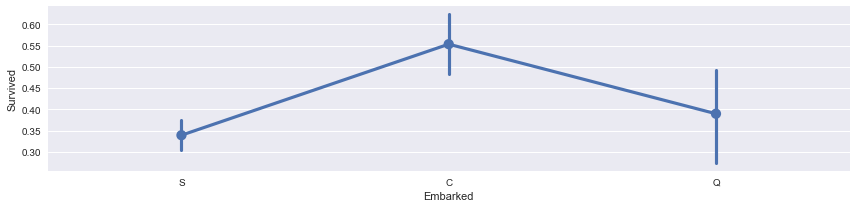

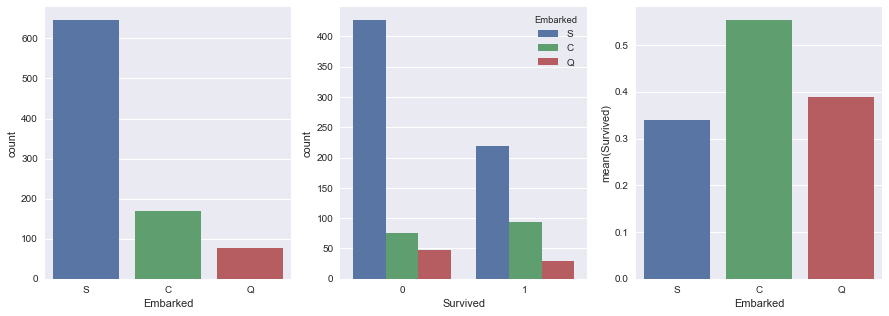

In [33]:
# plots
sns.factorplot('Embarked','Survived', data=tdata,size=3,aspect=4)
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.countplot(x='Embarked', data=tdata, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=tdata, ax=axis2)
sns.barplot(data = embarkS,x = 'Embarked', y = 'Survived',order = ['S','C','Q'])

发现一个有趣的现象，从C港登船的人，生存率显著高于平均值，S港登船的人生存率略低于平均值，这似乎有悖常识，需要进行进一步的研究。

In [34]:
Cdata = tdata.loc[tdata['Embarked'] == 'C']#单独检查C港登船人
Cdata.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000,168.000000
mean,0.553571,1.886905,30.720238,0.386905,0.363095,59.954144,0.750000
std,0.498608,0.944100,14.131938,0.557213,0.660481,83.912994,0.926974
min,0.000000,1.000000,0.000000,0.000000,0.000000,4.012500,0.000000
25%,0.000000,1.000000,21.750000,0.000000,0.000000,13.697950,0.000000
50%,1.000000,1.000000,30.000000,0.000000,0.000000,29.700000,0.000000
75%,1.000000,3.000000,39.000000,1.000000,1.000000,78.500025,1.000000
max,1.000000,3.000000,71.000000,2.000000,3.000000,512.329200,4.000000


In [35]:
Sdata = tdata.loc[tdata['Embarked'] == 'S'] #单独检查S港登船人
Sdata.describe() 

,Survived,Pclass,Age,SibSp,Parch,Fare,Family
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,0.339009,2.346749,29.496904,0.569659,0.411765,27.243651,0.981424
std,0.473740,0.791748,13.555141,1.215128,0.852239,35.952905,1.773088
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,8.050000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,27.900000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,263.000000,10.000000


对比C港登船乘客的相关统计量可以发现，C港登船乘客有超过50%是头等舱，同样的，他们所付的平均票价也远远高于平均值，相对的，S港登船乘客的舱位低于平均值，票价也低于平均值。

结合Pclass和Fare的研究，可以猜测C港登船乘客的生存率高很可能是与他们的舱位和票价相关，而和港口无关。

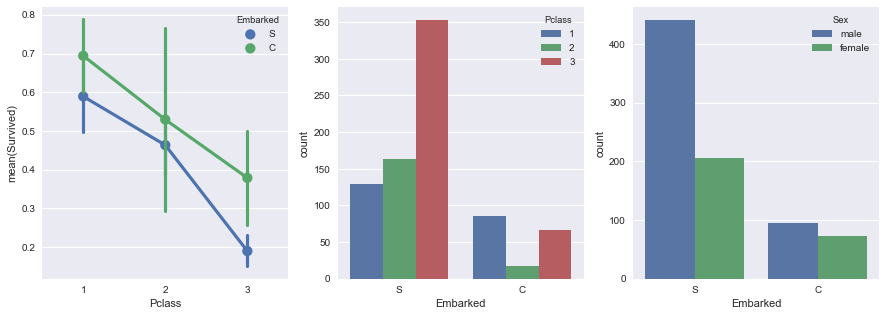

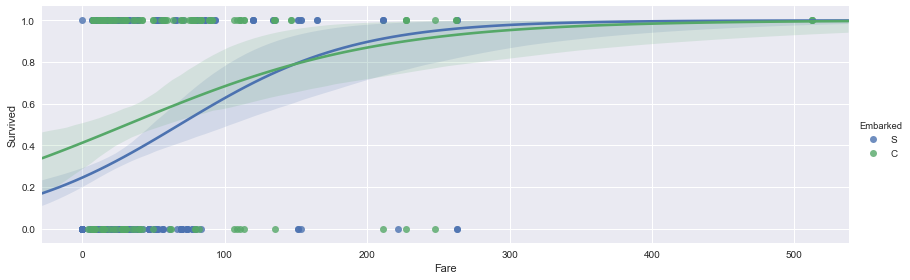

In [36]:
embarkPcFare = tdata[['Embarked','Survived','Fare','Pclass']]
embarkPcFare = embarkPcFare[embarkPcFare['Embarked'].isin(['C','S'])] #删除包含Q港的行

# 看看同舱位的情况下，S与C港生存率是否相同
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))
sns.pointplot(x = 'Pclass' , y = 'Survived', hue = 'Embarked',data = embarkPcFare, ax = axis1)

#查看不同港口舱位情况
embarkpc = tdata[['Embarked','Survived','Pclass']]
embarkpc = embarkpc[embarkpc['Embarked'].isin(['C','S'])] #删除包含Q港的行
sns.countplot(x='Embarked', hue="Pclass", data=embarkpc, ax=axis2)

# 查看不同港口的男女情况
embarksex = tdata[['Embarked','Survived','Sex']]
embarksex = embarksex[embarksex['Embarked'].isin(['C','S'])] #删除包含Q港的行
sns.countplot(x='Embarked', hue="Sex", data=embarksex, ax=axis3)

# S与C港乘客所付票价与生存率的关系
sns.lmplot(x = 'Fare' , y = 'Survived', hue = 'Embarked',logistic = True, data = embarkPcFare,\
           size = 4, aspect = 3)

在同舱位或同票价的情况下，S港与C港的生存率接近了很多。

仍在存在的差异很可能是由以下两个因素导致的：C港女性乘客比例大大高于S港，S港三等舱乘客比例非常高。

## 4.Conclusion and limitation 结论与局限性

### Conclusion 结论
由以上的分析与可视化，可以发现与生存率相关的最重要因素有四个：

#### 人口特征因素：

年龄Age：儿童（小于14岁）与老人（大于52岁）的生存率高于其他年龄层。

性别Sex：女性的生存率远远高于男性。

这两个因素都符合社会文化的习惯。对女性，儿童，老人的优先保护。

#### 社会因素：

家庭成员数量Family：有同伴一起登船的人生存率高于单身狗。同伴数量在1-3个的生存率较高，大于3个生存率骤减。

可能解释：同伴的存在可以在精神上和实际行动上互相鼓励和帮助，提高生存率。但太多的同伴又会导致互相牵制，被猪队友拖后腿~~~。

#### 经济相关因素

舱位Pclass：舱位越好，生存率越高。
经济相关因素最重要的是舱位。票价Fare的高低也主要体现在舱位上。

#### 其他
登船港口Embark：玄学因素。本身无影响，应当是由以上几个因素综合作用产生的结果。

In [37]:
# 清除已确认的间接和重复变量
logit = tdata.drop(['Embarked','SibSp','Parch'], axis = 1) #Embarked玄学，SibSp和Parch可以由Family体现

# Alone变量类型转换为int
logit['Alone'] = logit['Alone'] + 0

# 将Pclass设为虚拟变量
dummy_class = pd.get_dummies(logit['Pclass'], prefix = 'Pclass')
# 加入Pclass的虚拟变量 
logit = logit.join(dummy_class.ix[:, 'Pclass_1':])
# 添加逻辑回归的intercept值
logit['intercept'] = 1.0
# 清除原Pclass列
logit = logit.drop(['Pclass'], axis = 1)

# 将Sex变量转换为0,1
d = {'male': 1, 'female': 0}
logit['Sex'] = logit['Sex'].map(d)
logit.head()

,Survived,Sex,Age,Fare,Family,Alone,Pclass_1,Pclass_2,Pclass_3,intercept
0,0,1,22,7.2500,1,0,0,0,1,1.0
1,1,0,38,71.2833,1,0,1,0,0,1.0
2,1,0,26,7.9250,0,1,0,0,1,1.0
3,1,0,35,53.1000,1,0,1,0,0,1.0
4,0,1,35,8.0500,0,1,0,0,1,1.0


In [38]:
# 第一列之后作自变量，第一列是应变量
reg_cols = logit.columns[1:]
logit = sm.Logit(logit['Survived'], logit[reg_cols])
 
# 拟合模型
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.439785
         Iterations 6


D:\Anaconda2\lib\site-packages\statsmodels\base\model.py:1029: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(self.cov_params()))
D:\Anaconda2\lib\site-packages\statsmodels\base\model.py:1044: RuntimeWarning: invalid value encountered in absolute
  return stats.norm.sf(np.abs(self.tvalues))*2
D:\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
D:\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
D:\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      883
Method:                           MLE   Df Model:                            7
Date:                Fri, 24 Mar 2017   Pseudo R-squ.:                  0.3396
Time:                        01:53:12   Log-Likelihood:                -391.85
converged:                       True   LL-Null:                       -593.33
                                        LLR p-value:                 5.535e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Sex           -2.7134      0.200    -13.576      0.000      -3.105      -2.322
Age           -0.0354      0.007     -4.727      0.000      -0.050      -0.021
Fare           0.0025      0.002      1.049      0.294      -0.002       0.007
Family        -0.4179      0.100     -4.178      0.000      -0.614      -0.222
Alone         -0.7611      0.274     -2.777      0.005      -1.298      -0.224
Pclass_1       1.8091        nan        nan        nan         nan         nan
Pclass_2       0.8276        nan        nan        nan         nan         nan
Pclass_3      -0.2102        nan        nan        nan         nan         nan
intercept      2.4265        nan        nan        nan         nan         nan
==============================================================================
"""

逻辑回归的结果与结论相符，性别，舱位，是否有同伴三个因素与生存率强相关。（Age变量没有分年龄层，所以相关不明显，以后可以进一步处理。）

### Limitaion 局限性
#### 1.没有考虑Name，Ticket，Cabin三个变量。

Name变量可能会与家庭成员（SibSp，Parch）相关（兄弟，夫妻，父子等），也可能与社会经济地位相关（比如名字中含Master）。

Ticket变量可能与票价（Fare）相关，因为同一票号存在多张票，这种团购方式购买票价与单独购买的票价可能会不同。

Cabin变量影响的应该不大，舱号与舱位，票价相关，但对于生存率没有直接影响。

#### 2. 假设检验
各变量与生存与否的关系主要通过统计量和可视化发现，没有经过系统的假设检验过程。